In [1]:
from sentence_transformers import SentenceTransformer, models, util
import csv 
import json
import numpy as np
from torch import nn

/home/yunyi/.conda/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
word_embedding_model = models.Transformer('../../ZhiGuoLiZheng/pretrained/ZhiGuoLiZheng-BERT', 
                                        max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), 
                            out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, 
                                    pooling_model, 
                                    dense_model])

In [13]:
sentences = []
topic = []

with open("../data/long_sample.csv") as reader:
	csvreader = csv.reader(reader)
	next(csvreader)
	for tpc, st in csvreader:
		sentences.append(st)
		topic.append(tpc)
		
  

sen_ecd = model.encode(sentences)

In [14]:
sen_ecd.shape

(67, 256)

In [15]:
u,s,vh = np.linalg.svd(sen_ecd,full_matrices=True)

In [5]:
import matplotlib.pyplot as plt

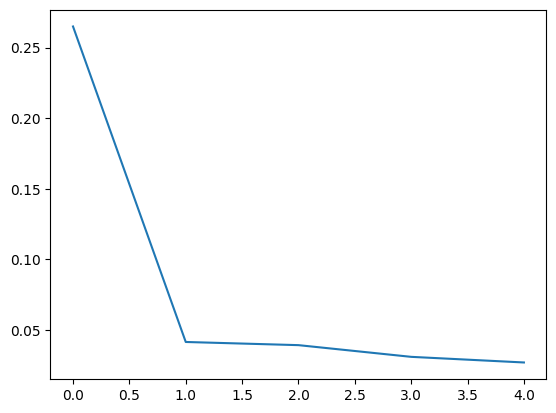

In [16]:
plt.plot(s[:5]/np.sum(s))

In [17]:
u.shape, s.shape, vh.shape

((67, 67), (67,), (256, 256))

In [20]:
dim = 3
smat = np.zeros((dim,dim))
smat[:dim,:dim] = np.diag(s[:dim])
reduced_emb = np.dot(u[:,:dim], smat)

In [21]:
reduced_emb.shape

(67, 3)

强调工作
对外开放
区域
财政
宏观政策
科技
意义
市场信心
社会


/home/yunyi/.conda/envs/torch/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
/home/yunyi/.conda/envs/torch/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22330 (\N{CJK UNIFIED IDEOGRAPH-573A}) missing from current font.
  func(*args, **kwargs)
/home/yunyi/.conda/envs/torch/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  func(*args, **kwargs)
/home/yunyi/.conda/envs/torch/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from current font.
  func(*args, **kwargs)
/home/yunyi/.conda/envs/torch/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from current font.
  func(*args, **kwargs)
/home/yunyi/.conda/envs/t

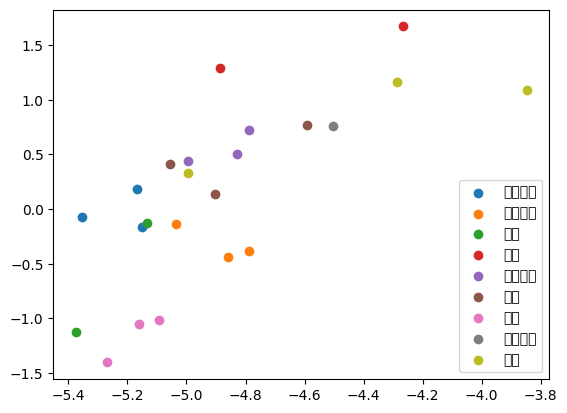

In [23]:
tpc_unique = list(set(topic))
for the_tpc in tpc_unique[:9]:
    idx = [i for i in range(len(topic)) if topic[i]==the_tpc]
    plt.scatter(reduced_emb[idx,0], reduced_emb[idx,1], label=the_tpc)
    print(the_tpc)
plt.legend()